# OS Prediction
In this section we should predict the operating system of cellphones based on data we have. This section has two parts.  The difference between these two parts is on "Battery Capacity" field from dataset.
## Part 1
In this part, we are going to predict OS from dataset we have. But, we are going to use "battery capacity" column as it is and as its numirical values.

First, we are going to import our required packages, import data and split tain and test
 

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [39]:
df = pd.read_csv('./data.csv')
df.head()

,Unnamed: 0,name,brand,2G,3G,4G,5G,Announced,Status,Weight,...,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
0,0,alcatel 1b (2022),alcatel,True,True,True,False,2022.0,Available,172.0,...,"5.0, A2DP",PowerVR GE8300,True,True,Mediatek MT6761 Helio A22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/11.1 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (dedicated slot),2.0,32.0
1,1,alcatel 1l pro (2021),alcatel,True,True,True,False,2021.0,Available,190.0,...,"4.2, A2DP",IMG8322,True,True,Unisoc SC9863A (28nm),"GSM / HSPA / LTE HSPA 21.1/5.76 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (uses shared SIM slot),2.0,32.0
2,2,alcatel 1 (2021),alcatel,True,True,True,False,2021.0,Available,134.0,...,"4.2, A2DP, LE",PowerVR GE8100,True,True,Mediatek MT6739 (28 nm),"GSM / HSPA / LTE HSPA 42.2/11.5 Mbps, LTE Cat4...","8GB 1GB RAM, 16GB 1GB RAM",microSDHC (dedicated slot),1.0,8.0
3,3,alcatel 3l (2021),alcatel,True,True,True,False,2021.0,Available,194.0,...,"5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",64GB 4GB RAM,microSDXC (only single sim model),4.0,64.0
4,4,alcatel 1s (2021),alcatel,True,True,True,False,2021.0,Available,190.0,...,"5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",32GB 3GB RAM,microSDXC (uses shared SIM slot),3.0,32.0


In [4]:
df.columns

Index(['Unnamed: 0', 'name', 'brand', '2G', '3G', '4G', '5G', 'Announced',
       'Status', 'Weight', 'Length', 'Width', 'Diameter', 'SIM',
       'Display Type', 'Display Size', 'ppi', 'body ratio', 'OS',
       'battery_capacity', 'Price', 'CPU', 'ratio', 'pixel', 'WLAN', 'Colors',
       'Sensors', 'Bluetooth', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset',
       'Network', 'Internal', 'Card slot', 'RAM', 'Storage'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,Announced,Weight,Display Size,ppi,body ratio,battery_capacity,Price,CPU,pixel,RAM,Storage
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2372.000000,2.651000e+03,2651.000000,2651.000000
mean,2495.184081,2016.577518,190.389325,5.759838,312.312335,71.775556,3385.437948,242.896775,5.847808,1.576779e+06,2.901974,46.621613
std,1290.683411,3.656827,97.208564,1.628346,101.907171,11.262514,1627.512406,193.726059,2.372880,1.181280e+06,2.493559,60.823522
min,0.000000,2010.000000,89.300000,2.200000,121.000000,25.500000,50.000000,20.000000,2.000000,7.680000e+04,0.062500,0.039062
25%,1450.000000,2014.000000,140.100000,4.700000,233.000000,64.650000,2070.000000,130.000000,4.000000,5.184000e+05,1.000000,8.000000
50%,2455.000000,2016.000000,167.000000,5.500000,288.000000,71.400000,3000.000000,190.000000,8.000000,1.094400e+06,2.000000,16.000000
75%,3681.000000,2020.000000,195.000000,6.530000,400.000000,81.800000,4500.000000,290.000000,8.000000,2.527200e+06,4.000000,64.000000
max,4678.000000,2024.000000,950.000000,14.600000,807.000000,94.100000,11560.000000,2000.000000,10.000000,8.294400e+06,16.000000,512.000000


Spliting Test and Train Data

In [40]:
target = df['OS']
df.drop('OS', axis=1, inplace=True)

In [41]:
X_train, X_test, y_train, t_test = train_test_split(df, target, test_size=0.15, random_state=42)

split Train and Validation dataset

In [42]:
X_tr, X_val, y_tr, t_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

### 1. EDA & Pre-Processing

Now we are going to have a small overview on our train data

In [43]:
X_tr.shape

(1915, 36)

In [44]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1915 entries, 390 to 187
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1915 non-null   int64  
 1   name              1915 non-null   object 
 2   brand             1915 non-null   object 
 3   2G                1915 non-null   bool   
 4   3G                1915 non-null   bool   
 5   4G                1915 non-null   bool   
 6   5G                1915 non-null   bool   
 7   Announced         1915 non-null   float64
 8   Status            1915 non-null   object 
 9   Weight            1915 non-null   float64
 10  Length            1915 non-null   object 
 11  Width             1915 non-null   object 
 12  Diameter          1915 non-null   object 
 13  SIM               1915 non-null   object 
 14  Display Type      1915 non-null   object 
 15  Display Size      1915 non-null   float64
 16  ppi               1915 non-null   float64
 17 

In [45]:
X_tr.columns

Index(['Unnamed: 0', 'name', 'brand', '2G', '3G', '4G', '5G', 'Announced',
       'Status', 'Weight', 'Length', 'Width', 'Diameter', 'SIM',
       'Display Type', 'Display Size', 'ppi', 'body ratio', 'battery_capacity',
       'Price', 'CPU', 'ratio', 'pixel', 'WLAN', 'Colors', 'Sensors',
       'Bluetooth', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset', 'Network',
       'Internal', 'Card slot', 'RAM', 'Storage'],
      dtype='object')

In [46]:
X_tr['Unnamed: 0'].value_counts()

Unnamed: 0
989     1
1573    1
2276    1
2879    1
4159    1
       ..
168     1
2132    1
1983    1
4303    1
552     1
Name: count, Length: 1915, dtype: int64

Due to its variety, It seems like This column is not very Useful. So, we are going to remove this column.

In [93]:
X_tr['name'].value_counts()

name
blu life pure xl                    1
huawei mate 20 rs porsche design    1
lg stylus 3                         1
nokia 701                           1
samsung galaxy j1 nxt               1
                                   ..
alcatel one touch scribe easy       1
lenovo s930                         1
lenovo a8 2020                      1
samsung galaxy note pro 12 2 3g     1
asus zenfone 6 zs630kl              1
Name: count, Length: 1915, dtype: int64

For the same reason, this column is useless too. So, we are going to remove this column.

In [94]:
X_tr.brand.value_counts()

brand
samsung    378
xiaomi     209
huawei     203
lg         163
zte        151
htc        148
lenovo     118
nokia      111
blu        103
alcatel     90
sony        86
asus        76
apple       50
infinix     29
Name: count, dtype: int64

Seems like this is a useful column. but for the sake of question we will drop this column too

<Axes: >

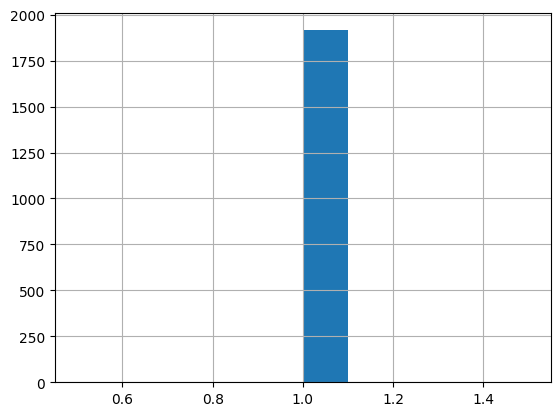

In [178]:
X_tr['2G'].hist()

It looks like this column is 1 for all of our data. So, It is not useful for our decision tree and we can remove it 

<Axes: >

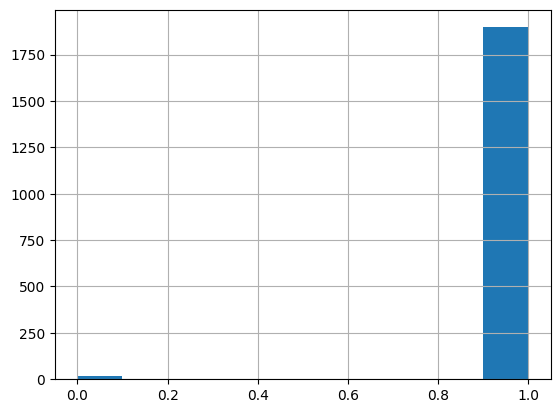

In [179]:
X_tr['3G'].apply(lambda x: 1 if x else 0).hist()

<Axes: >

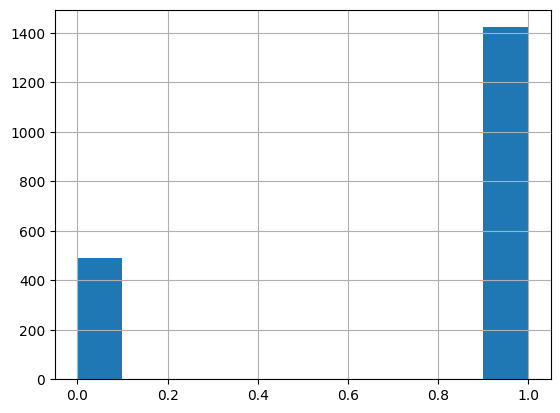

In [180]:
X_tr['4G'].apply(lambda x: 1 if x else 0).hist()

<Axes: >

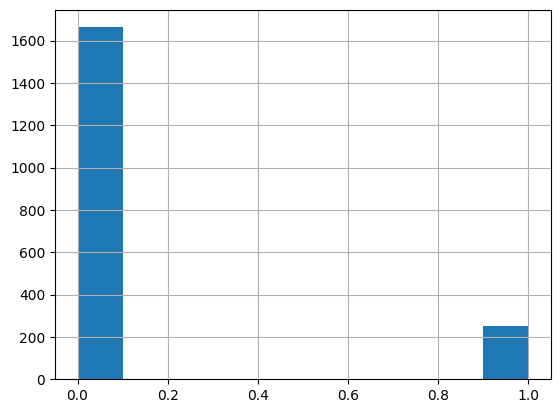

In [181]:
X_tr['5G'].apply(lambda x: 1 if x else 0).hist()

<Axes: >

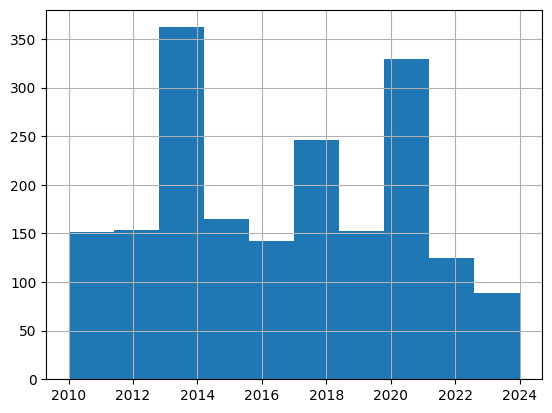

In [182]:
X_tr['Announced'].hist()

In [183]:
X_tr['Status'].value_counts()


Status
Discontinued    976
Available       936
Coming            3
Name: count, dtype: int64

In [184]:
X_tr['Weight'].value_counts()

Weight
160.0    41
150.0    37
130.0    33
145.0    32
155.0    28
         ..
265.0     1
631.0     1
295.1     1
194.8     1
177.6     1
Name: count, Length: 398, dtype: int64

The variety of Weight is a lot. so we can round them up to the nearest multiple of ten. 

As the variety of Length and Width is a lot, we present a formula to combine these two elements. we can use these two to compute the area of a cellphone. but befor that, we will round the amount of them up to the nearest multiple of ten. 

But unfortunetly there is a problem in these data and not all of them are float! so, we should correct them with 'toFloat' function

In [47]:
def toFloat(x):
    try:
        return float(x)
    except:
        try:
            return float(x.split(' ')[1])
        except:
            return float(x.split(' ')[0])
X_tr['Length'] = X_tr['Length'].apply(toFloat)
X_tr['Width'] = X_tr['Width'].apply(toFloat)

In [48]:
X_tr['Length_new'] = X_tr['Length'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_tr['Width_new'] = X_tr['Width'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)

<Axes: >

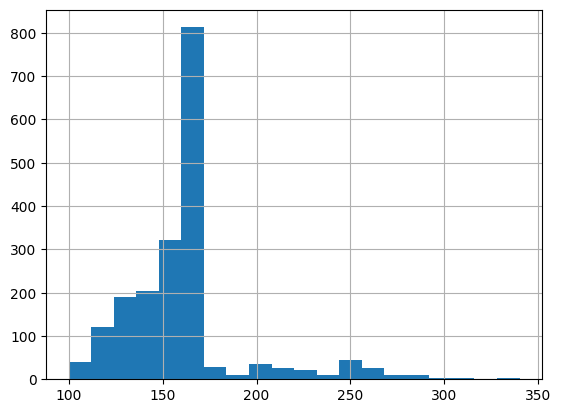

In [49]:
X_tr['Length_new'].hist(bins=20)

<Axes: >

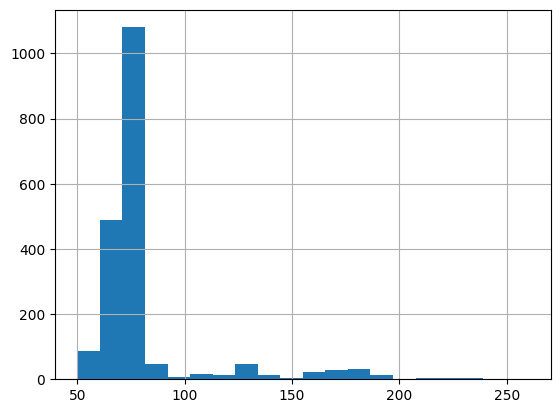

In [190]:
X_tr['Width_new'].hist(bins=20)

In [50]:
X_tr['area'] = X_tr['Length_new']*X_tr['Width_new']

<Axes: >

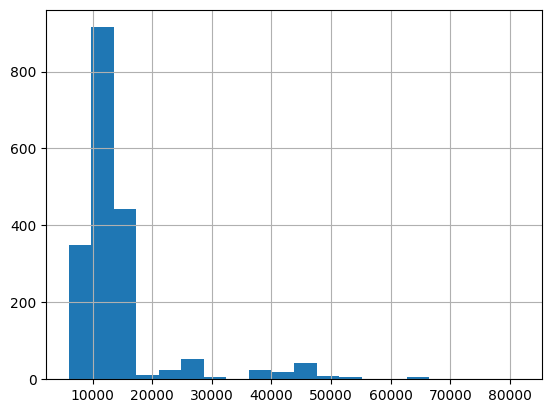

In [192]:
X_tr['area'].hist(bins=20)

'area' is very diverse and will be usefull for our work

Diameter will be processed as well as Length and Width. but instead we will round them to the nearest multiple of 5

In [51]:
def DtoFloat(x):
    try:
        return float(x)
    except:
        return float(x.split('-')[1].strip())
X_tr['Diameter'] = X_tr['Diameter'].apply(DtoFloat)

In [52]:
X_tr['Diameter_new'] = X_tr['Diameter'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)

In [196]:
X_tr['Diameter_new'].value_counts()

Diameter_new
10    1533
15     369
20      11
5        1
25       1
Name: count, dtype: int64

In [53]:
X_tr['SIM'].value_counts()

SIM
Nano-SIM     1055
Micro-SIM     450
Mini-SIM      336
eSIM           74
Name: count, dtype: int64

'SIM' column has will be used as it is.

In [54]:
X_tr['Display Type'].value_counts()

Display Type
IPS LCD                                          757
TFT                                              161
Super AMOLED                                     145
TFT, 256K colors                                  70
AMOLED                                            47
                                                ... 
AMOLED, 450 nits (typ), 1100 nits (peak)           1
Super AMOLED, 120Hz, HDR10+, 1100 nits (peak)      1
AMOLED, 1B colors, 120Hz, 1600 nits (peak)         1
OLED, 1B colors, 120Hz                             1
AMOLED, 120Hz, HDR10+, 1300 nits (peak)            1
Name: count, Length: 256, dtype: int64

As we can see, there are a lot of display type. we will categorized them.

In [55]:
def display_type(x):
    if 'IPS' in x:
        return 'IPS'
    elif 'Super AMOLED' in x:
        return 'Super AMOLED'
    elif 'OLED' in x:
        return 'OLED'
    elif 'PLS' in x:
        return 'PLS'
    elif 'Dynamic' in x:
        return 'Dynamic'
    elif 'S-LCD' in x:
        return 'S-LCD'
    elif 'LCD' in x:
        return 'LCD'
    elif 'LED-backlit' in x:
        return 'LED-backlit'
    else:
        return 'other'
    
X_tr['Display Type'] = X_tr['Display Type'].apply(display_type)

In [16]:
X_tr['Display Type'].value_counts()

Display Type
IPS             975
OLED            272
other           254
Super AMOLED    219
LCD             117
PLS              55
S-LCD            23
Name: count, dtype: int64

In [56]:
X_tr['Display Size'].apply(lambda x: round(x)).value_counts()

Display Size
6     571
5     387
7     365
4     356
10     72
3      65
8      50
11     18
13      8
12      8
9       7
2       6
15      2
Name: count, dtype: int64

In [57]:
X_tr['ppi'] = X_tr['ppi'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)

In [58]:
X_val['body ratio'] = X_val['body ratio'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)

In [59]:
X_val['battery_capacity'] = X_val['battery_capacity'].apply(lambda x: int(math.ceil(float(x) / 1000.0)) * 1000)

In [60]:
X_val['Price'] = X_val['Price'].apply(lambda x: int(math.ceil(float(x) / 50.0)) * 50)

<Axes: >

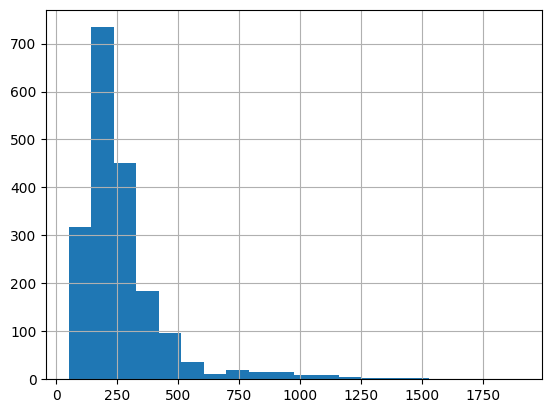

In [207]:
X_val['Price'].hist(bins=20)

In [204]:
X_tr['CPU'].value_counts()

CPU
8.0     907
4.0     520
2.0     241
6.0      36
10.0      2
3.0       1
Name: count, dtype: int64

In [205]:
X_tr['ratio'].value_counts()

ratio
16:9     714
20:9     340
5:3      211
5:9      183
16:10    131
18:9     112
4:3       75
3:2       65
19:9      49
21:9      15
7:9       10
3:9        8
17:9       2
Name: count, dtype: int64

In [124]:
X_tr['pixel'].value_counts()

pixel
921600.0     252
2073600.0    196
384000.0     189
2592000.0    175
1152000.0     98
            ... 
3170592.0      1
3307536.0      1
3932160.0      1
3709632.0      1
403200.0       1
Name: count, Length: 81, dtype: int64

'Pixel' column is duplicated with 'ppi' and 'display_size' so we can remove it

In [125]:
X_tr['WLAN'].value_counts()

WLAN
Wi-Fi 802.11 a/b/g/n/ac, dual-band, Wi-Fi Direct                                                          308
Wi-Fi 802.11 b/g/n, Wi-Fi Direct                                                                          232
Wi-Fi 802.11 b/g/n                                                                                        159
Wi-Fi 802.11 b/g/n, hotspot                                                                               153
Wi-Fi 802.11 b/g/n, Wi-Fi Direct, hotspot                                                                 114
                                                                                                         ... 
Wi-Fi 802.11 a/b/g/n, dual band, DLNA                                                                       1
Wi-Fi 802.11 a/b/g/n, Wi-Fi Direct, DLNAorWi-Fi 802.11 b/g/n, Wi-Fi Direct, DLNA                            1
Wi-Fi 802.11 a/b/g/n/ac/6/i/r, dual-band, Wi-Fi Direct                                                      1
Wi-Fi

Colors and Sensors of cellphones are very different, so we extract a feature from them. we will count the colors and sensorsed that was released with

In [61]:
def CountColor(x):
    try:
        return len(x.split(','))
    except:
        return 0
    
X_tr['Colors_count'] = X_tr['Colors'].apply(CountColor)

In [20]:
X_tr['Colors_count'].value_counts()

Colors_count
2     548
3     529
1     355
4     306
5     100
6      42
7      13
9      11
8       6
10      4
0       1
Name: count, dtype: int64

In [62]:
X_tr['Sensors_count'] = X_tr['Sensors'].apply(CountColor)

In [63]:
X_tr['Sensors_count'].value_counts()

Sensors_count
3     457
4     384
5     327
2     296
6     175
1     131
7      74
8      35
9      17
0      15
10      4
Name: count, dtype: int64

Bluetooth has a lot of information which are only description about the version and created a lot of diversity on this column. so we will extract its version

In [64]:
def extract_bluetooth_version(x):
    return x.split(',')[0].split('/')[0].split('(')[0].split(' ')[0].replace('v', '').strip()
    
X_tr['Bluetooth_version'] = X_tr['Bluetooth'].apply(extract_bluetooth_version)

In [65]:
X_tr['GPU'].value_counts()

GPU
PowerVR GE8320                                 97
Adreno 305                                     69
Adreno 200                                     66
Mali-400                                       53
Adreno 306                                     50
                                               ..
Adreno 405Mali-T720MP2                          1
Adreno 725                                      1
Adreno 710                                      1
Adreno 306 - EU modelAdreno 305 - USA model     1
Mali-G610 MC4                                   1
Name: count, Length: 205, dtype: int64

it seems like we could not extract any data from GPU

In [214]:
X_tr['Loudspeaker'].value_counts()

Loudspeaker
True     1428
False     487
Name: count, dtype: int64

In [215]:
X_tr['3.5mm jack'].value_counts()

3.5mm jack
True     1694
False     221
Name: count, dtype: int64

In [66]:
def extract_chipset(x):
    try:
        return x.split(' ')[0]
    except:
        return 'None'

X_tr['Chipset_type'] = X_tr['Chipset'].apply(extract_chipset)

In [220]:
X_tr['Chipset_type'].value_counts()

Chipset_type
Qualcomm       883
Mediatek       423
None           192
Exynos         117
Kirin           92
Apple           50
Unisoc          43
Intel           30
TI              19
Nvidia          17
Spreadtrum      13
Hummingbird      9
Huawei           8
NovaThor         6
MediaTek         2
BCM              2
Marvell          2
Broadcom         2
Intel®           1
NVIDIA           1
QM215            1
LG               1
5                1
Name: count, dtype: int64

In [135]:
X_tr['Network'].value_counts()

Network
GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4 150/50 Mbps                             239
GSM / HSPA / LTE HSPA, LTE                                                             172
GSM / HSPA HSPA 21.1/5.76 Mbps                                                         158
GSM / HSPA / LTE HSPA, LTE-A                                                           106
GSM / HSPA HSPA 7.2/5.76 Mbps                                                           72
                                                                                      ... 
GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 Mbps, LTE-A (3CA) Cat16 1024/150 Mbps      1
GSM / HSPA / LTE HSPA 21.1/5.76 Mbps, LTE, Cat6 300/50 Mbps                              1
GSM / HSPA / LTE HSPA, TD-SCDMA, LTE, TD-LTE                                             1
CDMA / EVDO / LTE EV-DO Rev.A 3.1 Mbps, LTE Class 13                                     1
GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE-A (5CA) Cat18 1200/150 Mbps             

'Network' has overlap with '2G', '3G', '4G' and '5G' columns so we sill not use it

In [136]:
X_tr['Internal'].value_counts()

Internal
8GB 1GB RAM                                                   134
16GB 2GB RAM                                                  114
4GB 512MB RAM                                                  81
32GB 3GB RAM                                                   76
16GB 1GB RAM                                                   68
                                                             ... 
8GB 1GB RAM, 16GB 1GB RAM, 16GB 2GB RAM (DL09)                  1
8GB (4GB user available), 512MB RAM                             1
16GB 2GB RAM, 64GB 3GB RAM                                      1
512GB 12GB RAM, 1TB 18GB RAM                                    1
64GB 6GB RAM, 128GB 6GB RAM, 256GB 8GB RAM, 512GB 12GB RAM      1
Name: count, Length: 407, dtype: int64

This column has overlap with 'RAM' and 'Storage' columns

In [67]:
def card_slot_data(x):
    if 'microSDXC' in x:
        return 'microSDXC'
    elif 'microSDHC' in x:
        return 'microSDHC'
    else:
        return 'other'

X_tr['Card_slots'] = X_tr['Card slot'].apply(card_slot_data)

In [25]:
X_tr['RAM'].value_counts()

RAM
1.000000     383
2.000000     352
4.000000     274
3.000000     222
0.500000     187
6.000000     176
8.000000     136
1.500000      48
0.250000      40
12.000000     32
0.750000      24
0.375000       9
0.562500       8
0.125000       6
0.062500       5
16.000000      4
0.271484       2
0.466797       1
0.273438       1
0.437500       1
0.625000       1
0.136719       1
0.283203       1
0.263672       1
Name: count, dtype: int64

In [224]:
X_tr['Storage'].value_counts()

Storage
16.000000     418
32.000000     327
64.000000     285
128.000000    262
8.000000      249
4.000000      198
256.000000     65
0.500000       41
2.000000       13
1.000000       12
512.000000      6
0.062500        4
0.250000        4
0.146484        4
1.100000        3
0.375000        3
0.156250        2
11.000000       2
0.154297        2
0.039062        2
1.500000        2
0.136719        1
13.200000       1
0.125000        1
0.175781        1
0.166016        1
0.048828        1
0.058594        1
3.000000        1
0.562500        1
0.253906        1
0.263672        1
Name: count, dtype: int64

So the column which will be deleted are:

'Unnamed: 0', 'name', 'brand', '2G','Weight', 'Diameter', 'pixel', 'WLAN', 'Network',
'Internal', 'Card slot'

And These columns will be deleted after we extract data from them:

'Length', 'Width','Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset'

and these columns will be used in our model and training:

'3G', '4G', '5G', 'Announced','Status', 'area', 'Weight_new', 'Diameter_new', 'SIM','Display Type', 'Display Size','ppi','body ratio', 'battery_capacity','Price', 'CPU', 'ratio', ,'Colors_count' ,'Sensors_count', 'Bluetooth_version', 'Loudspeaker', '3.5mm jack', 'Chipset_type', 'Card_slots', 'RAM', 'Storage'

In [68]:
X_tr.drop(['Unnamed: 0', 'name', 'brand', '2G','Weight', 'Diameter', 
           'pixel', 'WLAN', 'Network','Internal', 'Card slot', 'Length', 'Width',
           'Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset'], axis=1, inplace=True)

In [226]:
X_tr.columns

Index(['3G', '4G', '5G', 'Announced', 'Status', 'SIM', 'Display Type',
       'Display Size', 'ppi', 'body ratio', 'battery_capacity', 'Price', 'CPU',
       'ratio', 'Loudspeaker', '3.5mm jack', 'RAM', 'Storage', 'Weight_new',
       'Length_new', 'Width_new', 'area', 'Diameter_new', 'Colors_count',
       'Sensors_count', 'Bluetooth_version', 'Chipset_type', 'Card_slots'],
      dtype='object')

In [227]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1915 entries, 390 to 187
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   3G                 1915 non-null   bool   
 1   4G                 1915 non-null   bool   
 2   5G                 1915 non-null   bool   
 3   Announced          1915 non-null   float64
 4   Status             1915 non-null   object 
 5   SIM                1915 non-null   object 
 6   Display Type       1915 non-null   object 
 7   Display Size       1915 non-null   float64
 8   ppi                1915 non-null   int64  
 9   body ratio         1915 non-null   int64  
 10  battery_capacity   1915 non-null   int64  
 11  Price              1915 non-null   int64  
 12  CPU                1707 non-null   float64
 13  ratio              1915 non-null   object 
 14  Loudspeaker        1915 non-null   bool   
 15  3.5mm jack         1915 non-null   bool   
 16  RAM                1915 non-

### Remove NaNs

In [71]:
## TODO: Remove NAN
for col in X_tr.columns:
    if X_tr[col].isna().values.any():
        print(col)


CPU


We should remove NaN values from "CPU" column. first wi will show describe and histogram of this column and then we will decide what will be our NaN filling strategy 

In [72]:
X_tr['CPU'].describe()

count    1707.000000
mean        5.891623
std         2.370311
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        10.000000
Name: CPU, dtype: float64

<Axes: >

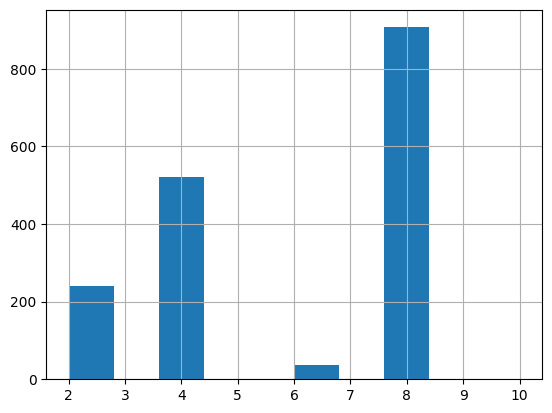

In [73]:
X_tr['CPU'].hist()

It seems that Average is a good amount for being replaced with NaN values

In [74]:
X_tr.fillna(np.mean(X_tr['CPU']), inplace=True)

Convert non-numerical Columns into numirecal values 

In [75]:
le = LabelEncoder()
sc = StandardScaler()

In [76]:
X_tr['3G'] = le.fit_transform(X_tr['3G'])
X_tr['4G'] = le.fit_transform(X_tr['4G'])
X_tr['5G'] = le.fit_transform(X_tr['5G'])
X_tr['Status'] = le.fit_transform(X_tr['Status'])
X_tr['SIM'] = le.fit_transform(X_tr['SIM'])
X_tr['Display Type'] = le.fit_transform(X_tr['Display Type'])
X_tr['ratio'] = le.fit_transform(X_tr['ratio'])
X_tr['Colors_count'] = le.fit_transform(X_tr['Colors_count'])
X_tr['Loudspeaker'] = le.fit_transform(X_tr['Loudspeaker'])
X_tr['3.5mm jack'] = le.fit_transform(X_tr['3.5mm jack'])
X_tr['Chipset_type'] = le.fit_transform(X_tr['Chipset_type'])
X_tr['Card_slots'] = le.fit_transform(X_tr['Card_slots'])
X_tr['Bluetooth_version'] = le.fit_transform(X_tr['Bluetooth_version'])

In [77]:
X_tr_scaled=sc.fit_transform(X_tr)

Now perform chages on validation and test data

In [78]:
X_val['Length'] = X_val['Length'].apply(toFloat)
X_val['Width'] = X_val['Width'].apply(toFloat)
X_val['Length_new'] = X_val['Length'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_val['Width_new'] = X_val['Width'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_val['area'] = X_val['Length_new']*X_val['Width_new']
X_val['Diameter'] = X_val['Diameter'].apply(DtoFloat)
X_val['Diameter_new'] = X_val['Diameter'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_val['Display Type'] = X_val['Display Type'].apply(display_type)
X_val['Display Size'].apply(lambda x: round(x)).value_counts()
X_val['ppi'] = X_val['ppi'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_val['body ratio'] = X_val['body ratio'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_val['battery_capacity'] = X_val['battery_capacity'].apply(lambda x: int(math.ceil(float(x) / 1000.0)) * 1000)
X_val['Price'] = X_val['Price'].apply(lambda x: int(math.ceil(float(x) / 50.0)) * 50)
X_val['Colors_count'] = X_val['Colors'].apply(CountColor)
X_val['Sensors_count'] = X_val['Sensors'].apply(CountColor)   
X_val['Bluetooth_version'] = X_val['Bluetooth'].apply(extract_bluetooth_version)
X_val['Chipset_type'] = X_val['Chipset'].apply(extract_chipset)
X_val['Card_slots'] = X_val['Card slot'].apply(card_slot_data)
X_val.drop(['Unnamed: 0', 'name', 'brand', '2G','Weight', 'Diameter', 
           'pixel', 'WLAN', 'Network','Internal', 'Card slot', 'Length', 'Width',
           'Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset'], axis=1, inplace=True)
X_val.fillna(np.mean(X_val['CPU']), inplace=True)
X_val['3G'] = le.fit_transform(X_val['3G'])
X_val['4G'] = le.fit_transform(X_val['4G'])
X_val['5G'] = le.fit_transform(X_val['5G'])
X_val['Status'] = le.fit_transform(X_val['Status'])
X_val['SIM'] = le.fit_transform(X_val['SIM'])
X_val['Display Type'] = le.fit_transform(X_val['Display Type'])
X_val['ratio'] = le.fit_transform(X_val['ratio'])
X_val['Colors_count'] = le.fit_transform(X_val['Colors_count'])
X_val['Loudspeaker'] = le.fit_transform(X_val['Loudspeaker'])
X_val['3.5mm jack'] = le.fit_transform(X_val['3.5mm jack'])
X_val['Chipset_type'] = le.fit_transform(X_val['Chipset_type'])
X_val['Card_slots'] = le.fit_transform(X_val['Card_slots'])
X_val['Bluetooth_version'] = le.fit_transform(X_val['Bluetooth_version'])
X_val_scaled=sc.fit_transform(X_val)

In [79]:
X_test['Length'] = X_test['Length'].apply(toFloat)
X_test['Width'] = X_test['Width'].apply(toFloat)
X_test['Length_new'] = X_test['Length'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_test['Width_new'] = X_test['Width'].apply(lambda x: int(math.ceil(float(x) / 10.0)) * 10)
X_test['area'] = X_test['Length_new']*X_test['Width_new']
X_test['Diameter'] = X_test['Diameter'].apply(DtoFloat)
X_test['Diameter_new'] = X_test['Diameter'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_test['Display Type'] = X_test['Display Type'].apply(display_type)
X_test['Display Size'].apply(lambda x: round(x)).value_counts()
X_test['ppi'] = X_test['ppi'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_test['body ratio'] = X_test['body ratio'].apply(lambda x: int(math.ceil(float(x) / 5.0)) * 5)
X_test['battery_capacity'] = X_test['battery_capacity'].apply(lambda x: int(math.ceil(float(x) / 1000.0)) * 1000)
X_test['Price'] = X_test['Price'].apply(lambda x: int(math.ceil(float(x) / 50.0)) * 50)
X_test['Colors_count'] = X_test['Colors'].apply(CountColor)
X_test['Sensors_count'] = X_test['Sensors'].apply(CountColor)   
X_test['Bluetooth_version'] = X_test['Bluetooth'].apply(extract_bluetooth_version)
X_test['Chipset_type'] = X_test['Chipset'].apply(extract_chipset)
X_test['Card_slots'] = X_test['Card slot'].apply(card_slot_data)
X_test.drop(['Unnamed: 0', 'name', 'brand', '2G','Weight', 'Diameter', 
           'pixel', 'WLAN', 'Network','Internal', 'Card slot', 'Length', 'Width',
           'Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset'], axis=1, inplace=True)
X_test.fillna(np.mean(X_test['CPU']), inplace=True)
X_test['3G'] = le.fit_transform(X_test['3G'])
X_test['4G'] = le.fit_transform(X_test['4G'])
X_test['5G'] = le.fit_transform(X_test['5G'])
X_test['Status'] = le.fit_transform(X_test['Status'])
X_test['SIM'] = le.fit_transform(X_test['SIM'])
X_test['Display Type'] = le.fit_transform(X_test['Display Type'])
X_test['ratio'] = le.fit_transform(X_test['ratio'])
X_test['Colors_count'] = le.fit_transform(X_test['Colors_count'])
X_test['Loudspeaker'] = le.fit_transform(X_test['Loudspeaker'])
X_test['3.5mm jack'] = le.fit_transform(X_test['3.5mm jack'])
X_test['Chipset_type'] = le.fit_transform(X_test['Chipset_type'])
X_test['Card_slots'] = le.fit_transform(X_test['Card_slots'])
X_test['Bluetooth_version'] = le.fit_transform(X_test['Bluetooth_version'])
X_test_scaled=sc.fit_transform(X_test)

### Clear OS Data

In [81]:
y_tr = pd.DataFrame(y_tr)
y_val = pd.DataFrame(t_val)
y_test = pd.DataFrame(t_test)

In [88]:
def os_category(x):
    try:
        x = x.split(' ')[0]
        if x == 'Android':
            return 1
        elif x == 'iOS':
            return 2
        elif x == 'Phone':
            return 3
        else:
            return 0
    except:
        return 0
y_tr['OS'] = y_tr['OS'].apply(os_category)
y_val['OS'] = y_val['OS'].apply(os_category)
y_test['OS'] = y_test['OS'].apply(os_category)

In [33]:
print(type(y_tr), type(t_val), type(t_test))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [89]:
X_tr_scaled = pd.DataFrame(X_tr_scaled)
X_val_scaled = pd.DataFrame(X_val_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)


X_tr_scaled.to_csv('./os_train_cleared.csv', index=False, header=True)
X_val_scaled.to_csv('./os_val_cleared.csv', index=False, header=True)
X_test_scaled.to_csv('./os_test_cleared.csv', index=False, header=True)

y_tr.to_csv('./target_train.csv', index=False, header=True)
y_val.to_csv('./target_val.csv', index=False, header=True)
y_test.to_csv('./target_test.csv', index=False, header=True)